# Foreign Exchange Rate Prediction using LSTM Recurrent Neural Network

We will implement the LSTM Recurrent Neural Network to predict the foreign exchange rate. The LSTM model will be trained to learn the series of previous observations and predict the next observation in the sequence. We will apply this model in predicting the foreign exchange rate of British Pounds to American Dollars.

In [1]:
# Importing Linraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras

# Setting seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
# Reading dataset
data_set = pd.read_csv('./GBPUSD.csv', na_values='ND')

In [3]:
data_set.shape

(10851, 2)

In [4]:
# Dataset head
data_set.head()

,Date,High
0,"January 2, 1990",1.6110
1,"January 3, 1990",1.6100
2,"January 4, 1990",1.6293
3,"January 5, 1990",1.6370
4,"January 8, 1990",1.6530


In [5]:
# Checking null values
data_set.isnull().sum()

Date    0
High    0
dtype: int64

In [6]:
data_set.interpolate(inplace=True)
data_set.isnull().sum()

Date    0
High    0
dtype: int64

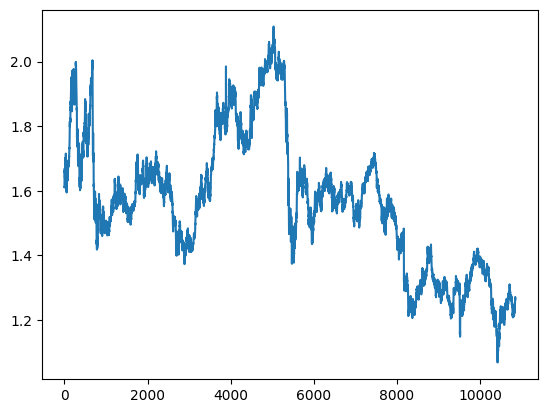

In [7]:
# Plotting GBPtoUSD Exchange rate
plt.plot(data_set['High'])

In [8]:
# Data frame
df = data_set['High']

In [9]:
print(df)

0        1.611000
1        1.610000
2        1.629300
3        1.637000
4        1.653000
           ...   
10846    1.260100
10847    1.260748
10848    1.270648
10849    1.268038
10850    1.263903
Name: High, Length: 10851, dtype: float64


In [10]:
# Preprocessing data set
df = np.array(df).reshape(-1,1)

In [11]:
df

array([[1.611   ],
       [1.61    ],
       [1.6293  ],
       ...,
       [1.270648],
       [1.268038],
       [1.263903]])

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
df = scaler.fit_transform(df)

In [14]:
df

array([[0.52178702],
       [0.52082675],
       [0.53935991],
       ...,
       [0.19495821],
       [0.19245192],
       [0.18848121]])

In [15]:
# Training and test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

num_train = int(len(df) * train_ratio)
num_val = int(len(df) * val_ratio)

train = df[:num_train]
val = df[num_train:num_train + num_val]
test = df[num_train + num_val:]

print(train.shape)
print(val.shape)
print(test.shape)

(8680, 1)
(1085, 1)
(1086, 1)


In [16]:
def get_data(data, look_back):
  datax, datay = [],[]
  for i in range(len(data)-look_back-1):
    datax.append(data[i:(i+look_back),0])
    datay.append(data[i+look_back,0])
  return np.array(datax) , np.array(datay)

In [17]:
look_back = 1

x_train , y_train = get_data(train, look_back)
print(x_train.shape)
print(y_train.shape)

(8678, 1)
(8678,)


In [18]:
x_val, y_val = get_data(val, look_back)
print(x_val.shape)
print(y_val.shape)

(1083, 1)
(1083,)


In [19]:
x_test , y_test = get_data(test, look_back)
print(x_test.shape)
print(y_test.shape)

(1084, 1)
(1084,)


In [20]:
# Processing train and test sets for LSTM model
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [21]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(8678, 1, 1)
(1083, 1, 1)
(1084, 1, 1)


In [22]:
# Defining the LSTM model
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [23]:
# Regular
n_features = x_train.shape[1]
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences = True, input_shape = (1,1)))
model.add(LSTM(50, activation='relu', return_sequences = True))
model.add(LSTM(25, activation='relu', return_sequences = True))
model.add(LSTM(10, activation='relu', return_sequences = True))
model.add(LSTM(5, activation='relu', return_sequences = False))
model.add(Dense(n_features))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            40800     
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             30200     
                                                                 
 lstm_2 (LSTM)               (None, 1, 25)             7600      
                                                                 
 lstm_3 (LSTM)               (None, 1, 10)             1440      
                                                                 
 lstm_4 (LSTM)               (None, 5)                 320       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 80366 (313.93 KB)
Trainable params: 80366 

In [25]:
# Compiling
# from keras import optimizers

# new_lr = 0.0001  # New learning rate
# optimizer = optimizers.Adam(learning_rate = new_lr)  # Example optimizer (Adam) with a new learning rate

model.compile(optimizer = 'adam', loss = 'mse')

In [26]:
# Training
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data = (x_val, y_val))

Epoch 1/100
272/272 [==============================] - 11s 11ms/step - loss: 0.0980 - val_loss: 0.0176
Epoch 2/100
272/272 [==============================] - 2s 9ms/step - loss: 0.0020 - val_loss: 0.0153
Epoch 3/100
272/272 [==============================] - 2s 7ms/step - loss: 0.0019 - val_loss: 0.0133
Epoch 4/100
272/272 [==============================] - 3s 12ms/step - loss: 0.0017 - val_loss: 0.0134
Epoch 5/100
272/272 [==============================] - 3s 9ms/step - loss: 0.0016 - val_loss: 0.0108
Epoch 6/100
272/272 [==============================] - 2s 9ms/step - loss: 0.0013 - val_loss: 0.0093
Epoch 7/100
272/272 [==============================] - 2s 8ms/step - loss: 9.5951e-04 - val_loss: 0.0065
Epoch 8/100
272/272 [==============================] - 2s 8ms/step - loss: 5.4276e-04 - val_loss: 0.0032
Epoch 9/100
272/272 [==============================] - 3s 10ms/step - loss: 2.4616e-04 - val_loss: 0.0012
Epoch 10/100
272/272 [==============================] - 3s 11ms/step - loss

In [27]:
history.history["loss"]

[0.09799160808324814,
 0.0020250724628567696,
 0.0018649641424417496,
 0.001723449444398284,
 0.0015644547529518604,
 0.001289065578021109,
 0.000959506374783814,
 0.0005427586729638278,
 0.00024616342852823436,
 0.00017859222134575248,
 0.0001631159393582493,
 0.00014129281044006348,
 0.00013009992835577577,
 0.00012072305980836973,
 0.00011293892021058127,
 0.00010752120579127222,
 9.906382183544338e-05,
 0.00010192870104219764,
 0.00010215016664005816,
 0.0001016760288621299,
 9.735955245560035e-05,
 9.652080916566774e-05,
 0.00010097720223711804,
 0.00010211217886535451,
 0.00010113076132256538,
 9.528826194582507e-05,
 0.00010339802975067869,
 9.507658251095563e-05,
 9.987949306378141e-05,
 0.00010038002801593393,
 0.00010675568773876876,
 9.91134875221178e-05,
 0.00010298541747033596,
 9.73473652265966e-05,
 9.699373913463205e-05,
 9.562795457895845e-05,
 9.757981752045453e-05,
 9.966455399990082e-05,
 9.571960981702432e-05,
 9.79107862804085e-05,
 9.922195749823004e-05,
 9.61638

In [28]:
# Prediction using the trained model
scaler.scale_

array([0.96026703])

In [29]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])

34/34 [==============================] - 1s 5ms/step
[[1.3388588]
 [1.3361464]
 [1.3311847]
 [1.3315426]
 [1.3315426]
 [1.3353997]
 [1.3402369]
 [1.3356124]
 [1.3504949]
 [1.3488629]]


In [30]:
# Processing test shape
y_test = np.array(y_test).reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)
print(y_test[:10])

[[1.335265]
 [1.330291]
 [1.33065 ]
 [1.33065 ]
 [1.334517]
 [1.33936 ]
 [1.33473 ]
 [1.34961 ]
 [1.347981]
 [1.34395 ]]


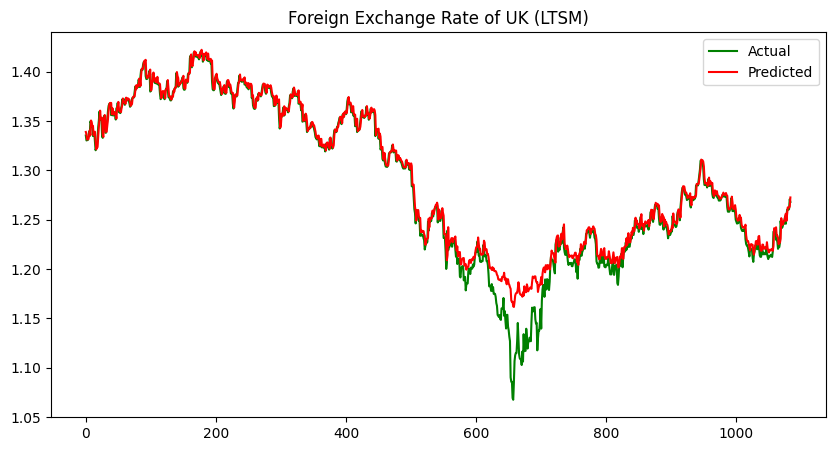

In [39]:
# Visualizing the results
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of UK (LTSM)')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_pred)

0.00022765428137788837

In [33]:
from keras.layers import Flatten

# Building the DNN model
model_dnn = Sequential()
model_dnn.add(Flatten(input_shape=(1, 1)))
model_dnn.add(Dense(128, activation='relu'))  # Layer 1
model_dnn.add(Dense(64, activation='relu'))   # Layer 2
model_dnn.add(Dense(32, activation='relu'))   # Layer 3
model_dnn.add(Dense(16, activation='relu'))   # Layer 4
model_dnn.add(Dense(8, activation='relu'))    # Layer 5
model_dnn.add(Dense(1))

In [34]:
# Compiling the DNN model
model_dnn.compile(optimizer = 'adam', loss = 'mse')

# Training the DNN model
model_dnn.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data = (x_val, y_val))

Epoch 1/100
272/272 [==============================] - 2s 3ms/step - loss: 0.0275 - val_loss: 1.1008e-04
Epoch 2/100
272/272 [==============================] - 1s 3ms/step - loss: 8.6109e-05 - val_loss: 3.7110e-05
Epoch 3/100
272/272 [==============================] - 1s 2ms/step - loss: 8.6266e-05 - val_loss: 3.7722e-05
Epoch 4/100
272/272 [==============================] - 1s 2ms/step - loss: 8.5581e-05 - val_loss: 3.7866e-05
Epoch 5/100
272/272 [==============================] - 1s 2ms/step - loss: 8.7325e-05 - val_loss: 3.6862e-05
Epoch 6/100
272/272 [==============================] - 1s 2ms/step - loss: 8.9720e-05 - val_loss: 4.0207e-05
Epoch 7/100
272/272 [==============================] - 1s 2ms/step - loss: 8.7427e-05 - val_loss: 3.7097e-05
Epoch 8/100
272/272 [==============================] - 1s 2ms/step - loss: 9.0477e-05 - val_loss: 5.5400e-05
Epoch 9/100
272/272 [==============================] - 1s 2ms/step - loss: 9.8308e-05 - val_loss: 3.7197e-05
Epoch 10/100
272/272 [=

In [35]:
# Making predictions using the DNN model
y_pred_dnn = model_dnn.predict(x_test)
y_pred_dnn = scaler.inverse_transform(y_pred_dnn)
print(y_pred_dnn[:10])

34/34 [==============================] - 0s 1ms/step
[[1.3376985]
 [1.3352953]
 [1.3314946]
 [1.3317684]
 [1.3317684]
 [1.3347191]
 [1.3389726]
 [1.3348815]
 [1.3484503]
 [1.3469437]]


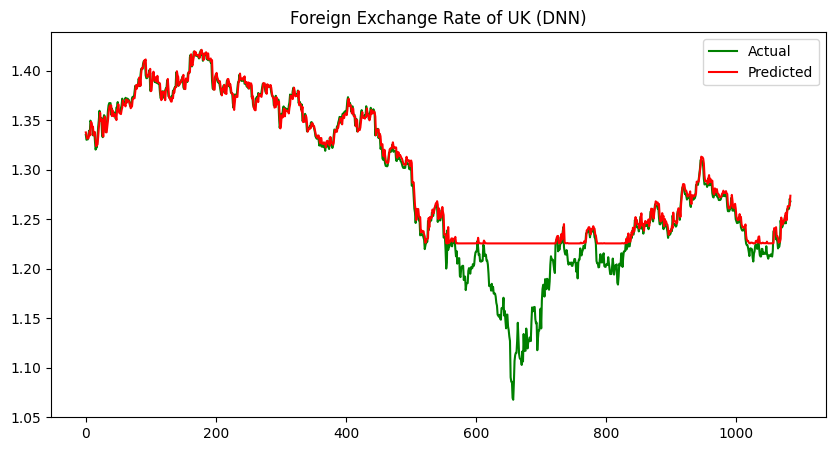

In [38]:
# Visualizing the results
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of UK (DNN)')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred_dnn , label = 'Predicted', color = 'r')
plt.legend()

In [37]:
# Calculating metrics for LSTM model
mse_lstm = mean_squared_error(y_test, y_pred)
rmse_lstm = np.sqrt(mse_lstm)  # Calculate RMSE using MSE
r2_lstm = r2_score(y_test, y_pred)

print("LSTM Model:")
print(f"MSE: {mse_lstm}")
print(f"RMSE: {rmse_lstm}")
print(f"R-squared: {r2_lstm}")

# Calculating metrics for DNN model
mse_dnn = mean_squared_error(y_test, y_pred_dnn)
rmse_dnn = np.sqrt(mse_dnn)  # Calculate RMSE using MSE
r2_dnn = r2_score(y_test, y_pred_dnn)

print("\nDNN Model:")
print(f"MSE: {mse_dnn}")
print(f"RMSE: {rmse_dnn}")
print(f"R-squared: {r2_dnn}")

LSTM Model:
MSE: 0.00022765428137788837
RMSE: 0.015088216640076731
R-squared: 0.9645630235210961

DNN Model:
MSE: 0.0007256897578141481
RMSE: 0.026938629471711214
R-squared: 0.8870381408028323


In [63]:
# latest_data_point = data_set['High'].iloc[-1]
# latest_data_point_scaled = scaler.transform(np.array(latest_data_point).reshape(-1, 1))
# latest_data_point_scaled = latest_data_point_scaled.reshape(1, 1, 1)
# # Predict using the LSTM model
# next_day_pred_lstm = model.predict(latest_data_point_scaled)
# next_day_pred_lstm = scaler.inverse_transform(next_day_pred_lstm)

# # Predict using the DNN model
# next_day_pred_dnn = model_dnn.predict(latest_data_point_scaled)
# next_day_pred_dnn = scaler.inverse_transform(next_day_pred_dnn)

In [64]:
# print("Predicted exchange rate using LSTM model for the next day:", next_day_pred_lstm[0][0])
# print("Predicted exchange rate using DNN model for the next day:", next_day_pred_dnn[0][0])

In [56]:
# Number of days to predict
num_days = 7

last_date = data_set['Date'].iloc[-1]

# Get the latest data point
latest_data_point = data_set['High'].iloc[-1]

# Reshape and scale the latest data point
latest_data_point_scaled_lstm = scaler.transform(np.array(latest_data_point).reshape(-1, 1))
latest_data_point_scaled_lstm = latest_data_point_scaled_lstm.reshape(1, 1, 1)

latest_data_point_scaled_dnn = scaler.transform(np.array(latest_data_point).reshape(-1, 1))
latest_data_point_scaled_dnn = latest_data_point_scaled_dnn.reshape(1, 1, 1)

# Lists to store predicted values and dates for each day using both models
predictions_lstm = []
dates_lstm = []
predictions_dnn = []
dates_dnn = []

In [61]:
for i in range(num_days):
    # Predict using the LSTM model
    next_day_pred_lstm = model.predict(latest_data_point_scaled_lstm)
    next_day_pred_lstm = scaler.inverse_transform(next_day_pred_lstm)
    predictions_lstm.append(next_day_pred_lstm[0][0])

    # Generate date for the next LSTM prediction
    last_date = pd.to_datetime(last_date) + pd.DateOffset(days=1)
    dates_lstm.append(last_date)

    # Update the latest_data_point_scaled for the next day's prediction using the LSTM predicted value
    latest_data_point_scaled_lstm = np.array([next_day_pred_lstm]).reshape(1, 1, 1)

    # Use the LSTM predicted value as the latest_data_point_scaled for the next DNN prediction
    latest_data_point_scaled_dnn = scaler.transform(np.array(next_day_pred_lstm).reshape(-1, 1))
    latest_data_point_scaled_dnn = latest_data_point_scaled_dnn.reshape(1, 1, 1)

    # Predict using the DNN model
    next_day_pred_dnn = model_dnn.predict(latest_data_point_scaled_dnn)
    next_day_pred_dnn = scaler.inverse_transform(next_day_pred_dnn)
    predictions_dnn.append(next_day_pred_dnn[0][0])

    # Generate date for the next DNN prediction
    last_date = pd.to_datetime(last_date) + pd.DateOffset(days=1)
    dates_dnn.append(last_date)

    # Use the DNN predicted value as the latest_data_point_scaled for the next LSTM prediction
    latest_data_point_scaled_lstm = scaler.transform(np.array(next_day_pred_dnn).reshape(-1, 1))
    latest_data_point_scaled_lstm = latest_data_point_scaled_lstm.reshape(1, 1, 1)

1/1 [==============================] - 0s 34ms/step


In [65]:
# Print predicted exchange rates and dates for the next week using LSTM and DNN models
print("Predicted exchange rates for the next week (using LSTM model):")
for i in range(num_days):
    print(f"Date: {dates_lstm[i].date()}, Prediction: £1.00 = ${predictions_lstm[i]:.2f}")

print("\nPredicted exchange rates for the next week (using DNN model):")
for i in range(num_days):
    print(f"Date: {dates_dnn[i].date()}, Prediction: £1.00 = ${predictions_dnn[i]:.2f}")

Predicted exchange rates for the next week (using LSTM model):
Date: 2023-12-01, Prediction: £1.00 = $1.27
Date: 2023-12-03, Prediction: £1.00 = $1.27
Date: 2023-12-05, Prediction: £1.00 = $1.28
Date: 2023-12-07, Prediction: £1.00 = $1.28
Date: 2023-12-09, Prediction: £1.00 = $1.29
Date: 2023-12-11, Prediction: £1.00 = $1.29
Date: 2023-12-13, Prediction: £1.00 = $1.29

Predicted exchange rates for the next week (using DNN model):
Date: 2023-12-02, Prediction: £1.00 = $1.27
Date: 2023-12-04, Prediction: £1.00 = $1.27
Date: 2023-12-06, Prediction: £1.00 = $1.28
Date: 2023-12-08, Prediction: £1.00 = $1.28
Date: 2023-12-10, Prediction: £1.00 = $1.29
Date: 2023-12-12, Prediction: £1.00 = $1.29
Date: 2023-12-14, Prediction: £1.00 = $1.30
